###Analyzing Survival Disparities: Contrasts Between COVID-19 Survivors and Fatalities

#Hypothetical Use Case 2

What are the differences between those who survived and died during the pandemic?

**Exercise Goal:** Profile, preprocess, and clean the raw job posting dataset to make it suitable for analysis



In [ ]:
#importing the relevant libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# mount drive to access the dataset saved from Google drive (this will help each member to work with the same database)
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


## Exploring the dataset

In [ ]:
covid_df0 = pd.read_csv("/content/drive/MyDrive/DATADROP 2021_V0.csv")
covid_df = covid_df0.copy()

<ipython-input-3-a5e3902785a8>:1: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  covid_df0 = pd.read_csv("/content/drive/MyDrive/DATADROP 2021_V0.csv")


In [ ]:
#display first 5 rows
covid_df.head()

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C404174,38.0,35 to 39,FEMALE,NaN,01/30/2020,01/30/2020,NaN,NaN,RECOVERED,...,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,RECOVERED,NO,01/21/2020,NO,"Removal Type is ""Recovered"", but no Recovered ..."
1,C462688,44.0,40 to 44,MALE,NaN,01/30/2020,02/03/2020,02/01/2020,NaN,DIED,...,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,DIED,NO,01/18/2020,NaN,NaN
2,C387710,60.0,60 to 64,FEMALE,01/23/2020,01/30/2020,02/05/2020,NaN,01/31/2020,RECOVERED,...,BOHOL,PANGLAO,PH071233000,NaN,NaN,RECOVERED,NO,01/21/2020,NO,Case has Admitting Facility but is not Admitte...
3,C498051,63.0,60 to 64,MALE,03/05/2020,NaN,03/06/2020,03/11/2020,NaN,DIED,...,RIZAL,CAINTA,PH045805000,NaN,NaN,DIED,NO,NaN,NaN,"Case has Lab Result, but Result Date is blank"
4,C377460,49.0,45 to 49,MALE,NaN,NaN,03/06/2020,NaN,NaN,RECOVERED,...,BATANGAS,SANTO TOMAS,PH041028000,NaN,NaN,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."


In [ ]:
covid_df.shape

(1000000, 22)

In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CaseCode           1000000 non-null  object 
 1   Age                997807 non-null   float64
 2   AgeGroup           997807 non-null   object 
 3   Sex                1000000 non-null  object 
 4   DateSpecimen       704041 non-null   object 
 5   DateResultRelease  702771 non-null   object 
 6   DateRepConf        1000000 non-null  object 
 7   DateDied           19726 non-null    object 
 8   DateRecover        302409 non-null   object 
 9   RemovalType        997578 non-null   object 
 10  Admitted           316516 non-null   object 
 11  RegionRes          996907 non-null   object 
 12  ProvRes            967022 non-null   object 
 13  CityMunRes         957285 non-null   object 
 14  CityMuniPSGC       957285 non-null   object 
 15  BarangayRes        749833 non-nul

In [ ]:
#find any null values in the dataset
covid_df.isnull().sum()

CaseCode                  0
Age                    2193
AgeGroup               2193
Sex                       0
DateSpecimen         295959
DateResultRelease    297229
DateRepConf               0
DateDied             980274
DateRecover          697591
RemovalType            2422
Admitted             683484
RegionRes              3093
ProvRes               32978
CityMunRes            42715
CityMuniPSGC          42715
BarangayRes          250167
BarangayPSGC         250167
HealthStatus              0
Quarantined             147
DateOnset            698173
Pregnanttab          527065
ValidationStatus     282102
dtype: int64

In [ ]:
#detect existing non-missing values
covid_df.notna().sum()

CaseCode             1000000
Age                   997807
AgeGroup              997807
Sex                  1000000
DateSpecimen          704041
DateResultRelease     702771
DateRepConf          1000000
DateDied               19726
DateRecover           302409
RemovalType           997578
Admitted              316516
RegionRes             996907
ProvRes               967022
CityMunRes            957285
CityMuniPSGC          957285
BarangayRes           749833
BarangayPSGC          749833
HealthStatus         1000000
Quarantined           999853
DateOnset             301827
Pregnanttab           472935
ValidationStatus      717898
dtype: int64

In [ ]:
#checking for duplicates
covid_df.duplicated().sum() #counts the number of duplicate items

0

##Feature Selection

We have selected relevant fields in which we could get some insight to solve our problem.

The table below shows the meta data taken from DOH (https://drive.google.com/drive/folders/1Ule24SFmIMVSsaPmempNpRy2zgbIDiV0)

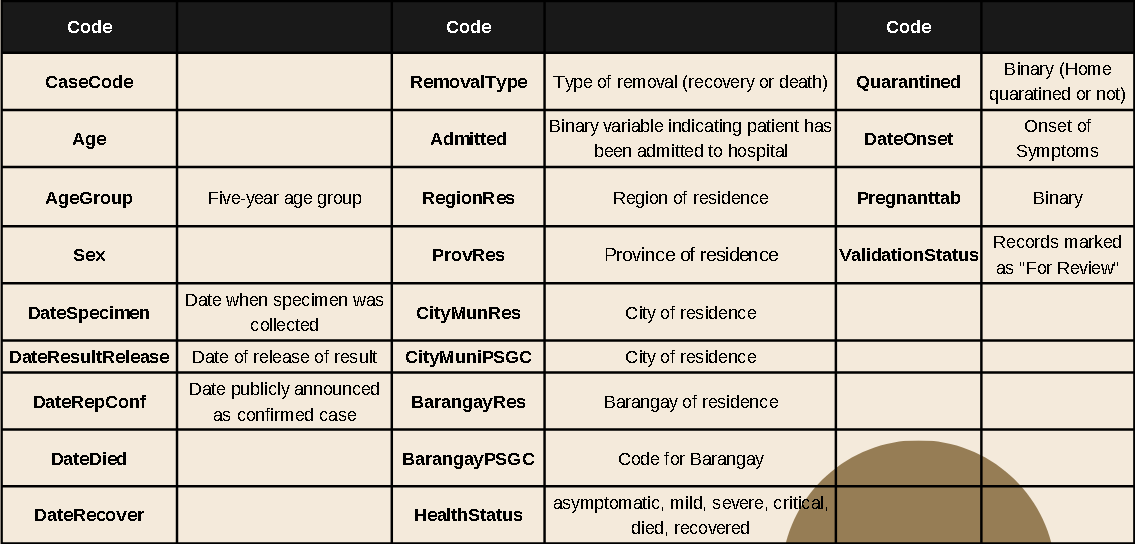

Those in red color are the fields that we have droped.

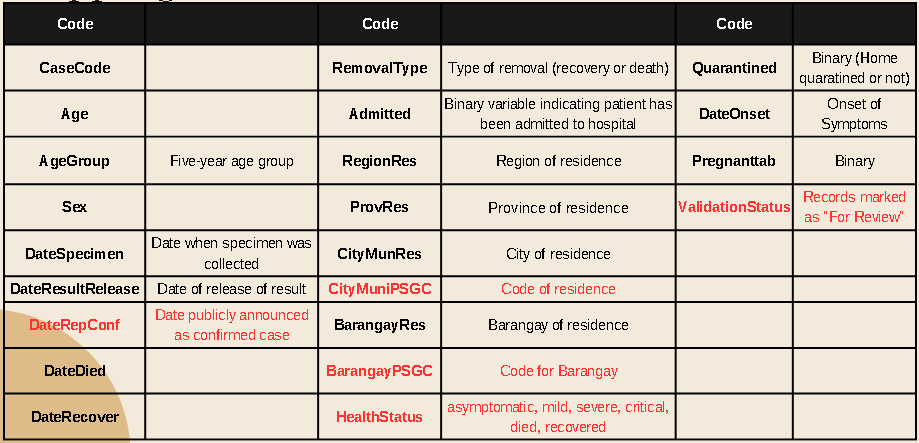

In [ ]:
# Checking values under RemovalType
covid_df['RemovalType'].value_counts()

RECOVERED    977745
DIED          19833
Name: RemovalType, dtype: int64

###Dropping Columns

In [ ]:
covid_df.drop(['DateRepConf', 'CityMuniPSGC', 'BarangayPSGC', 'HealthStatus', 'ValidationStatus'], axis=1, inplace=True)

In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CaseCode           1000000 non-null  object 
 1   Age                997807 non-null   float64
 2   AgeGroup           997807 non-null   object 
 3   Sex                1000000 non-null  object 
 4   DateSpecimen       704041 non-null   object 
 5   DateResultRelease  702771 non-null   object 
 6   DateDied           19726 non-null    object 
 7   DateRecover        302409 non-null   object 
 8   RemovalType        997578 non-null   object 
 9   Admitted           316516 non-null   object 
 10  RegionRes          996907 non-null   object 
 11  ProvRes            967022 non-null   object 
 12  CityMunRes         957285 non-null   object 
 13  BarangayRes        749833 non-null   object 
 14  Quarantined        999853 non-null   object 
 15  DateOnset          301827 non-nul

### Dealing with Data Gaps

In [ ]:
# Dropping empty values under "Removal Type"
covid_df = covid_df.dropna(subset="RemovalType")

In [ ]:
covid_df.shape

(997578, 17)

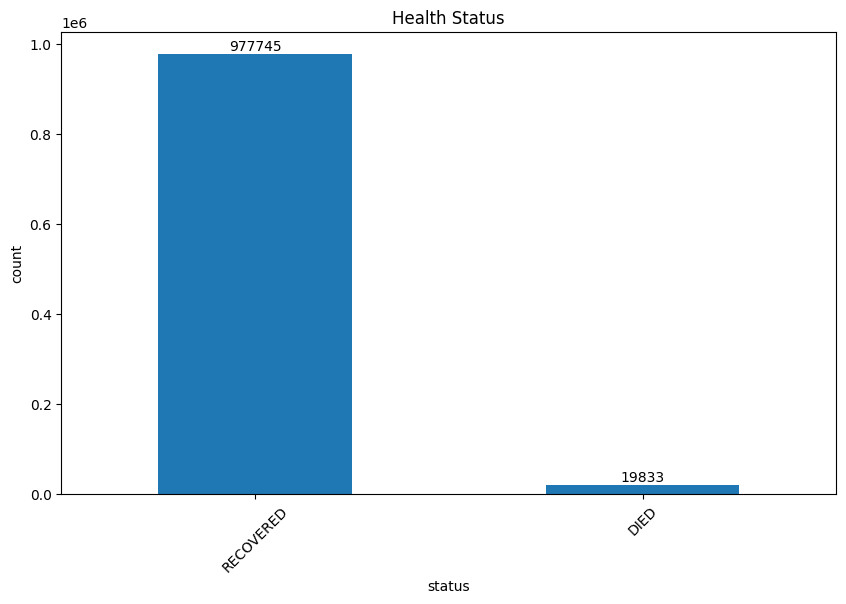

In [ ]:
# Count the occurrences of each category in 'RemovalType'
health_status = covid_df['RemovalType'].value_counts()

# Graph RemovalType
plt.figure(figsize=(10, 6))
health_status.plot(kind = 'bar')
plt.xticks(rotation=45)

# Add counts as annotations on top of the bars
for i, count in enumerate(health_status.values):
  plt.text(i, count, str(count), ha='center', va='bottom')

# Adding labels and titles
plt.xlabel("status")
plt.ylabel("count")
plt.title("Health Status")
plt.show()


## Changing Datatypes

In [ ]:
covid_df['DateSpecimen'] = pd.to_datetime(covid_df['DateSpecimen'])
covid_df['DateResultRelease'] = pd.to_datetime(covid_df['DateResultRelease'])
covid_df['DateDied'] = pd.to_datetime(covid_df['DateDied'])
covid_df['DateRecover'] = pd.to_datetime(covid_df['DateRecover'])

<ipython-input-25-5ccd78b10131>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df['DateSpecimen'] = pd.to_datetime(covid_df['DateSpecimen'])
<ipython-input-25-5ccd78b10131>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df['DateResultRelease'] = pd.to_datetime(covid_df['DateResultRelease'])
<ipython-input-25-5ccd78b10131>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997578 entries, 0 to 999999
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CaseCode           997578 non-null  object        
 1   Age                995389 non-null  float64       
 2   AgeGroup           995389 non-null  object        
 3   Sex                997578 non-null  object        
 4   DateSpecimen       701977 non-null  datetime64[ns]
 5   DateResultRelease  700705 non-null  datetime64[ns]
 6   DateDied           19726 non-null   datetime64[ns]
 7   DateRecover        302409 non-null  datetime64[ns]
 8   RemovalType        997578 non-null  object        
 9   Admitted           314911 non-null  object        
 10  RegionRes          994489 non-null  object        
 11  ProvRes            964641 non-null  object        
 12  CityMunRes         954932 non-null  object        
 13  BarangayRes        748205 non-null  object  

## Checking the columns

In [ ]:
covid_df["CaseCode"].nunique()

997578

In [ ]:
covid_df['Sex'].value_counts()

MALE      526979
FEMALE    473021
Name: Sex, dtype: int64

In [ ]:
covid_df["Age"].value_counts()

 28.0     30550
 27.0     30284
 29.0     30074
 30.0     29933
 26.0     29751
          ...  
 104.0        4
 106.0        4
 107.0        3
 102.0        3
-1.0          1
Name: Age, Length: 109, dtype: int64

In [ ]:
covid_df["AgeGroup"].value_counts()

25 to 29    150368
30 to 34    132499
20 to 24    105379
35 to 39    101182
40 to 44     87231
45 to 49     72833
50 to 54     66685
55 to 59     57376
60 to 64     46127
15 to 19     36707
65 to 69     32588
10 to 14     23313
70 to 74     22652
5 to 9       17234
0 to 4       16964
80+          13774
75 to 79     12477
Name: AgeGroup, dtype: int64

In [ ]:
covid_df[covid_df["Age"] < 0]

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateDied,DateRecover,RemovalType,Admitted,RegionRes,ProvRes,CityMunRes,BarangayRes,Quarantined,DateOnset,Pregnanttab
11857,C397879,-1.0,0 to 4,MALE,2020-05-11,2020-05-12,NaT,NaT,RECOVERED,NaN,NCR,NCR,CITY OF MUNTINLUPA,NaN,YES,NaN,NaN


<Axes: >

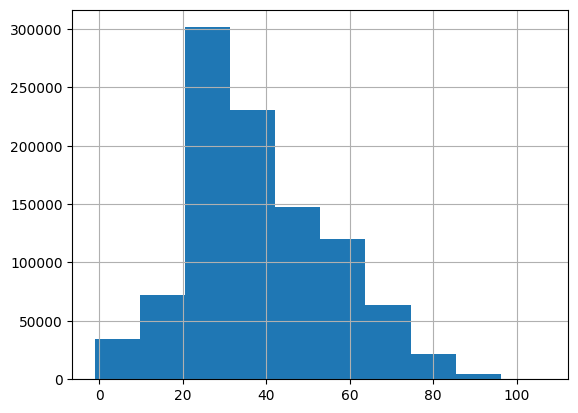

In [ ]:
covid_df.Age.hist()

In [ ]:
covid_df["RegionRes"].value_counts()

NCR                               441226
Region IV-A: CALABARZON           174043
Region III: Central Luzon          80513
Region VII: Central Visayas        57981
Region VI: Western Visayas         36939
Region II: Cagayan Valley          29588
CAR                                28463
Region XI: Davao Region            24129
ROF                                21924
Region VIII: Eastern Visayas       18554
Region I: Ilocos Region            16540
Region X: Northern Mindanao        15209
Region IX: Zamboanga Peninsula     10495
CARAGA                             10270
Region V: Bicol Region              9457
Region XII: SOCCSKSARGEN            8048
Region IV-B: MIMAROPA               5621
BARMM                               5489
Name: RegionRes, dtype: int64

In [ ]:
covid_df["ProvRes"].value_counts()

NCR                434680
CAVITE              53663
CEBU                51804
RIZAL               43314
LAGUNA              40126
                    ...  
DINAGAT ISLANDS       242
TAWI-TAWI             222
CAMIGUIN              152
SIQUIJOR              148
BATANES                16
Name: ProvRes, Length: 84, dtype: int64

In [ ]:
covid_df["CityMunRes"].value_counts()

QUEZON CITY              87201
CITY OF MANILA           58297
CALOOCAN CITY            31338
CITY OF PASIG            30087
TAGUIG CITY              29703
                         ...  
SOUTH UBIAN                  1
LINAPACAN                    1
MANGUDADATU                  1
PAGAYAWAN (TATARIKAN)        1
PAGLAT                       1
Name: CityMunRes, Length: 1425, dtype: int64

In [ ]:
covid_df["Quarantined"].value_counts()

NO     801192
YES    196239
Name: Quarantined, dtype: int64

In [ ]:
covid_df["DateOnset"].value_counts()

01/01/2021    5376
04/16/2021    3253
04/05/2021    3237
04/15/2021    3230
03/29/2021    3103
              ... 
03/04/2020      27
04/26/2021       5
04/25/2021       3
01/21/2020       2
01/18/2020       1
Name: DateOnset, Length: 424, dtype: int64

In [ ]:
covid_df["Pregnanttab"].value_counts()

NO     471819
YES       105
Name: Pregnanttab, dtype: int64

In [ ]:
covid_df['Sex'].value_counts()

MALE      525568
FEMALE    472010
Name: Sex, dtype: int64

In [ ]:
covid_df.to_excel('doh_covid_clean.xlsx')